Importing libraries for data manipulation and visualization.

In [5]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Reading the csv file into a dataframe. Then each column of the dataframe is tranformed into a series for accessibilty.

In [4]:

db = pd.read_csv('DataBreaches(2004-2021).csv')

company=db['Entity']
year=db['Year']
records=db['Records']
organization_type=db['Organization type']
method = db['Method']


The series_replace function replaces a number of strings with a given a string.

In [ ]:

def series_replace(db_data,cate,string):
    '''A function that replaces a number of strings with a given a string'''
    data_mod=db_data.replace(cate,string).str.lower()
    data_mod.sort_values(inplace = True)
    return data_mod
    

This is a plot that shows the number of occurrences per the method of breach. 

Text(0.5, 0, 'Number of Occurrences')

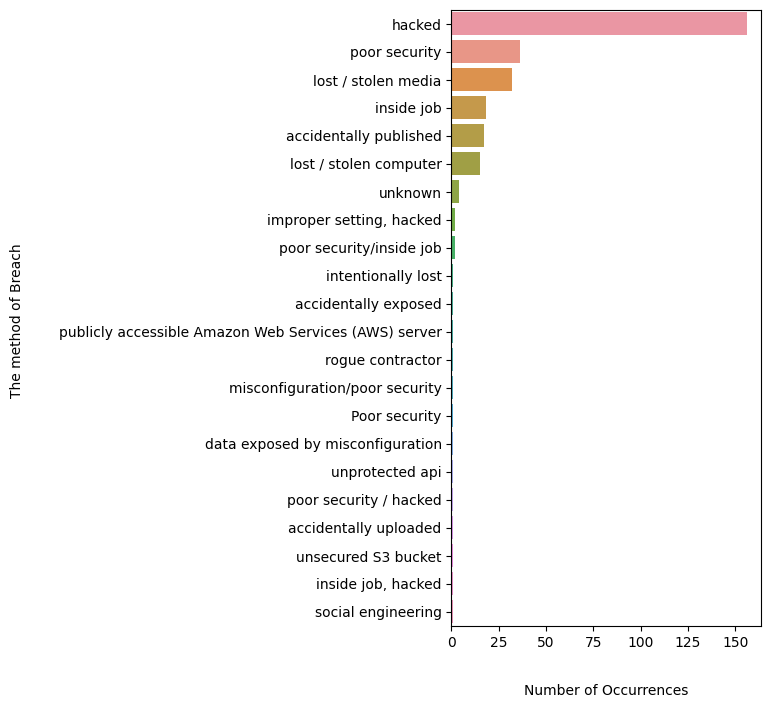

In [19]:

plt.figure(figsize=(4,8))
sns.countplot(y=method.values,order=method.value_counts().index)
plt.ylabel("Method of Breach ",labelpad=25)
plt.xlabel("Number of Occurrences",labelpad=25)


This is a plot that shows the number of occurrences per type of organization.

Text(0.5, 0, 'Number of Occurrences')

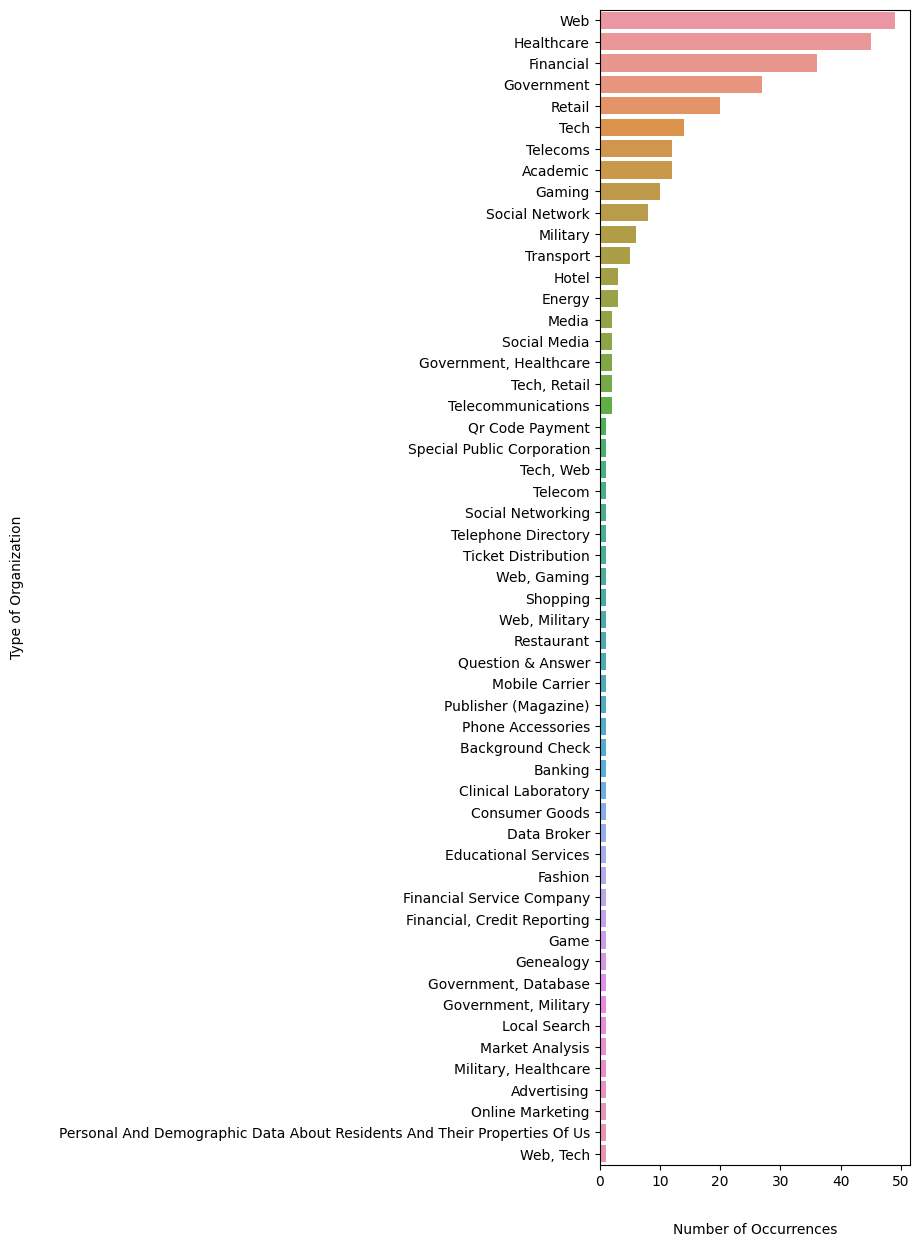

In [27]:
db_case=db['Organization type'].str.lower().sort_values()
db_case=pd.Series([i.title()for i in db_case])

plt.figure(figsize=(4,15))
#plt.xticks(rotation =90)
sns.countplot(y = db_case.values,order=db_case.value_counts().index)
plt.ylabel("Type of Organization",labelpad=25)
plt.xlabel("Number of Occurrences",labelpad=25)